In [42]:
import pandas as pd

PATH   = ('/Users/soyoung/ml_project/test_proj/와인/train.csv')
data = pd.read_csv(PATH)
data = data.drop_duplicates()

In [43]:
from sklearn.preprocessing import MinMaxScaler

mscaler = MinMaxScaler()
data.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [44]:
# 변환데이터
y= data.pop('alcohol')
X = data.drop('type',axis=1)
X

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41


In [45]:
X = mscaler.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
y_test.size

1650

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred.size

1650

In [50]:
from sklearn.metrics import r2_score

In [51]:
r2_score(y_test,pred)

0.7981378134077495

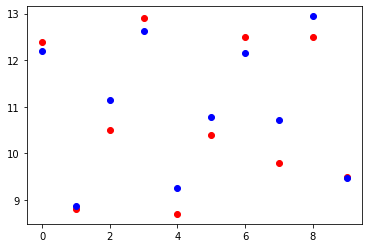

In [53]:
import matplotlib.pyplot as plt
plt.plot(y_test.to_numpy()[:10],'ro')
plt.plot(pred[:10],'bo')